# Exploratory Data Analysis (EDA) of Partial Discharge Data

This notebook provides a step-by-step guide to performing Exploratory Data Analysis (EDA) on the partial discharge dataset. We will be using the `inferred_annotation.csv` and `748987.npy` files.

**Our goals for this EDA are:**
1.  Understand the structure and contents of the metadata (`inferred_annotation.csv`) which is accessable via the following link https://springernature.figshare.com/collections/A_data_set_of_Signals_from_an_Antenna_for_Detection_of_Partial_Discharges_in_Overhead_Insulated_Power_Line/6628553/1.
2.  Analyze the distribution of the target variable (`faultAnnotation`).
3.  Explore the time-series data in the `.npy` file.
4.  Visualize the time-series data to identify any interesting patterns.

## 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metadata
metadata_df = pd.read_csv('../unitest/data/inferred_annotation.csv')

# Load the time-series data
time_series_data = np.load('../unitest/data/748987.npy')

## 2. Analyzing the Metadata

In [2]:
print("Metadata Head:")
print(metadata_df.head())

Metadata Head:
   idStation  idMeasurement  faultAnnotation            timeStamp
0      52007         381913                0  2017-11-11 00:00:00
1      52007         381935                0  2017-11-11 01:00:00
2      52007         381954                0  2017-11-11 02:00:00
3      52007         381973                0  2017-11-11 03:00:00
4      52007         381990                0  2017-11-11 04:00:00


In [4]:
print("Metadata Info:")
print(metadata_df.info())

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151434 entries, 0 to 151433
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   idStation        151434 non-null  int64 
 1   idMeasurement    151434 non-null  int64 
 2   faultAnnotation  151434 non-null  int64 
 3   timeStamp        151434 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.6+ MB
None


In [5]:
print("Fault Annotation Distribution:")
print(metadata_df['faultAnnotation'].value_counts())

Fault Annotation Distribution:
faultAnnotation
0    149493
1      1941
Name: count, dtype: int64


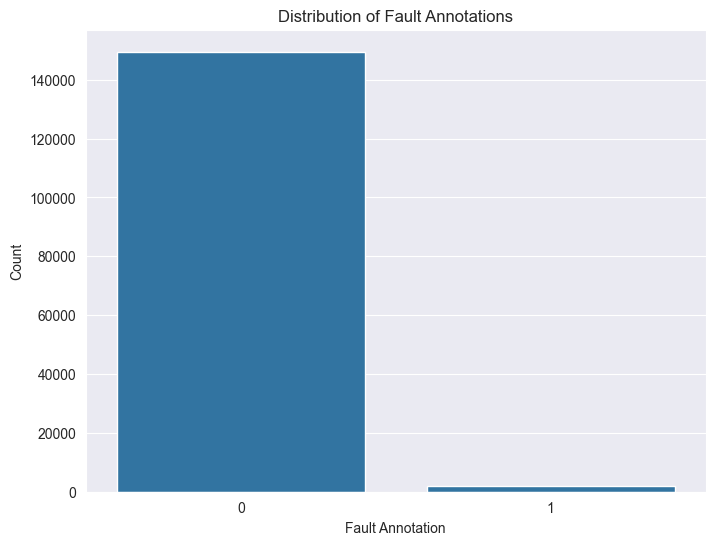

In [6]:
# Plotting the fault annotation distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='faultAnnotation', data=metadata_df)
plt.title('Distribution of Fault Annotations')
plt.xlabel('Fault Annotation')
plt.ylabel('Count')
plt.show()

The distribution of the `faultAnnotation` is highly imbalanced, with the vast majority of measurements being annotated as `0` (no fault). This is a critical observation that will influence our modeling strategy.

## 3. Analyzing Station Data

In [7]:
print("Station Distribution:")
print(metadata_df['idStation'].value_counts())

Station Distribution:
idStation
52009    23641
52008    23626
52007    22969
52012    22762
52014    21608
52013    18588
52011    10016
52010     8224
Name: count, dtype: int64


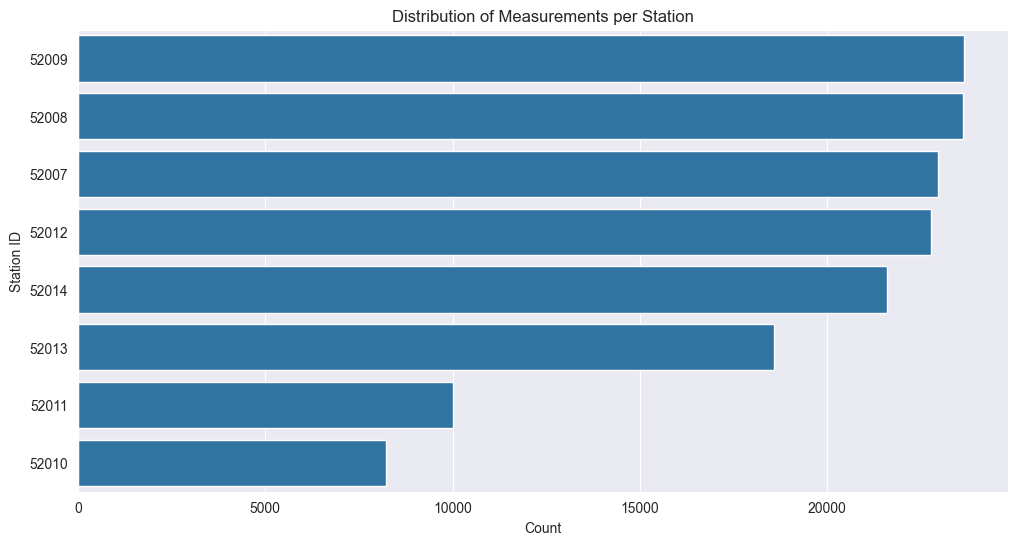

In [8]:
# Plotting the station distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='idStation', data=metadata_df, order = metadata_df['idStation'].value_counts().index)
plt.title('Distribution of Measurements per Station')
plt.xlabel('Count')
plt.ylabel('Station ID')
plt.show()

This plot shows the number of measurements recorded for each station. This information can be useful for understanding if there are any station-specific patterns in the data.

## 4. Visualizing the Time-Series Data

In [9]:
print("Time-Series Data Shape:")
print(time_series_data.shape)

Time-Series Data Shape:
(800000,)


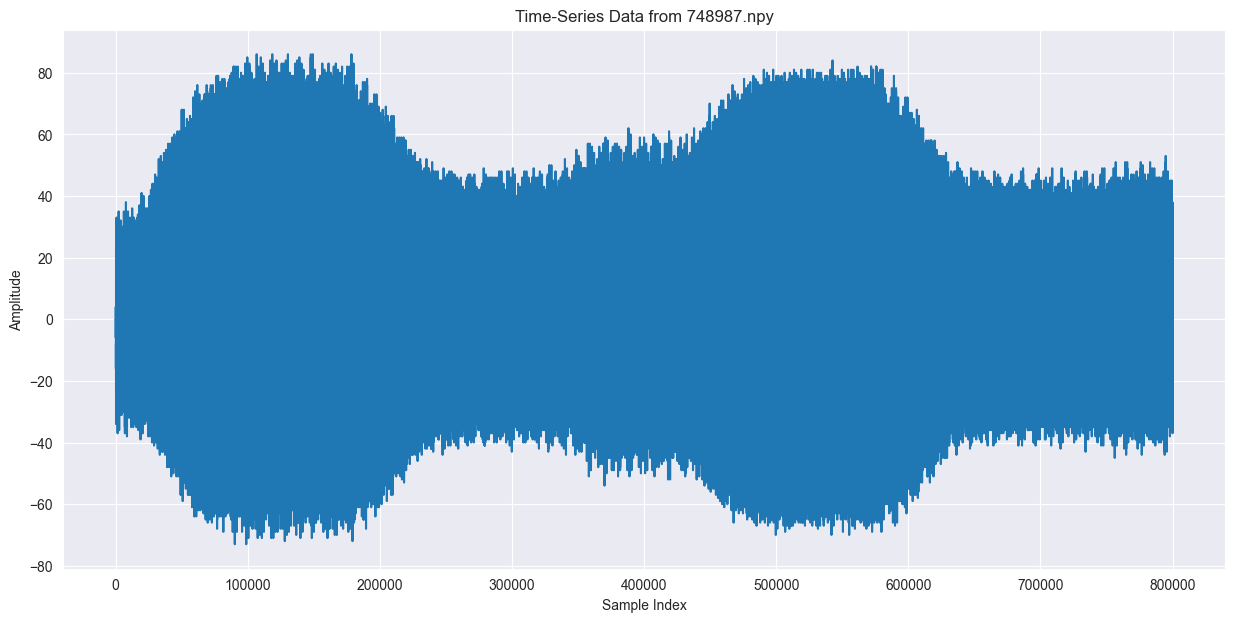

In [10]:
# Plotting the time-series data
plt.figure(figsize=(15, 7))
plt.plot(time_series_data.T) # Transpose to plot columns if data is 2D
plt.title('Time-Series Data from 748987.npy')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

This plot shows the raw time-series data. We can see some periodic patterns and some spikes, which could be indicative of partial discharges. Further analysis would be needed to correlate these patterns with the `faultAnnotation`.

## 5. Conclusion

This EDA has given us a good initial understanding of the partial discharge dataset. We've learned that:

*   The dataset is imbalanced, which will require special handling during model training.
*   We have data from multiple stations, and the number of measurements per station varies.
*   The time-series data shows some interesting patterns that warrant further investigation.

This analysis provides a solid foundation for the next steps in the machine learning pipeline, such as feature engineering and model building.